# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

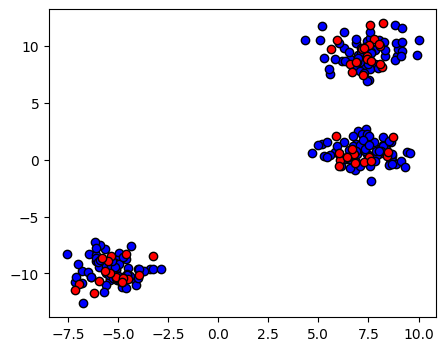

In [3]:
X, _ = make_blobs(n_samples = 250, n_features = 2, random_state=8)

# Train test splits
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_train[:,0], X_train[:,1], c = 'b', edgecolors = 'k')
ax.scatter(X_test[:,0], X_test[:,1], c = 'r', edgecolors = 'k')
plt.show()

In [52]:
Rango = 30 # rango_mas_alto en mis muestras (en este caso, entre -15 y 15, el rango es 30)
print('Valor de epsilon:{0}'.format(Rango*0.1)) #Calcular el valor necesario de epsilon: entre el 1% y el 10% de mi rango
print('---Total de mis muestras---'.format(len(X_test)))
print('Valor de min_samples:{0}'.format(len(X_test)*0.1)) #Calcular el valor necesario de min samples: entre el 1% y el 10% de mis muestras

Valor de epsilon:3.0
---Total de mis muestras---
Valor de min_samples:5.0


In [54]:
dbscan = DBSCAN(eps = 3, min_samples = 5)

# Train DBSCAN
dbscan.fit(X_test)

DBSCAN(eps=3)

In [55]:
# Predictions
predictions = dbscan.labels_

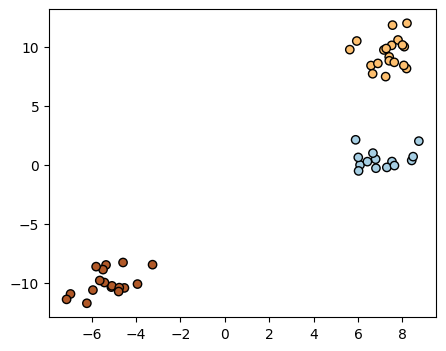

In [56]:
_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_test[:,0], X_test[:,1], c = predictions, edgecolors='k', cmap = 'Paired')

In [57]:
print(np.unique(predictions, return_counts = True))

(array([0, 1, 2]), array([14, 19, 17]))


# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _

In [ ]:
# Plot
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

(128, 128, 3)


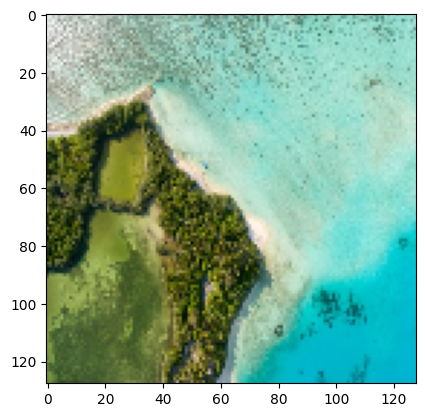

In [66]:
original_img = cv2.imread('/content/image1.jpeg')
img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (128, 128))
plt.imshow(img_rgb)
print(img_rgb.shape)

In [69]:
vectorize_rgb = img_rgb.copy().reshape(-1, 3)
print(vectorize_rgb.shape)

(16384, 3)


In [80]:
dbscan = DBSCAN(eps = 25, min_samples = 163) #El 10% del rango de muestras (entre 0 y 255 en este caso)
#En este caso, el número de píxeles es gigante para seguir la regla anterior de cálculo de min_samples. Probar valores en su lugar
dbscan.fit(vectorize_rgb)

DBSCAN(eps=25, min_samples=163)

In [81]:
predictions = dbscan.labels_
print(predictions.shape)
predictions = predictions.reshape(img_rgb.shape[:2])
print(predictions.shape)

(16384,)
(128, 128)


(<matplotlib.image.AxesImage at 0x7d28511e4210>, Text(0.5, 1.0, 'DBSCAN'))

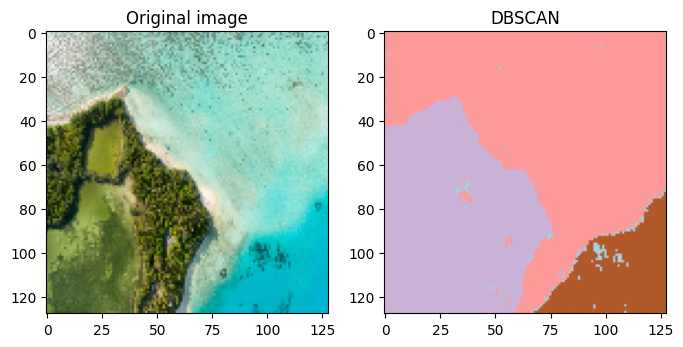

In [82]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_rgb), axes[0].set_title('Original image')
axes[1].imshow(predictions, cmap = 'Paired'), axes[1].set_title('DBSCAN')

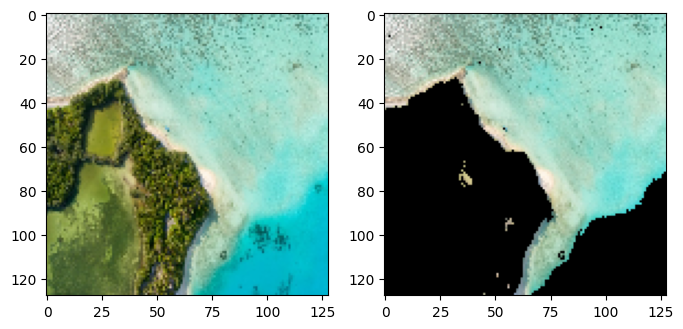

In [115]:
cluster = 0
cluster_mask = np.array(predictions == cluster, dtype = np.uint8)
masked_image = cv2.bitwise_and(img_rgb.copy(), img_rgb.copy(), mask = cluster_mask)

_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_rgb)
axes[1].imshow(masked_image)